<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf

# Correct the typo in the attribute name from 'fasion_mnist' to 'fashion_mnist'
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
X_train.shape

(5000, 28, 28)

In [22]:
X_train.dtype

dtype('uint8')

In [23]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

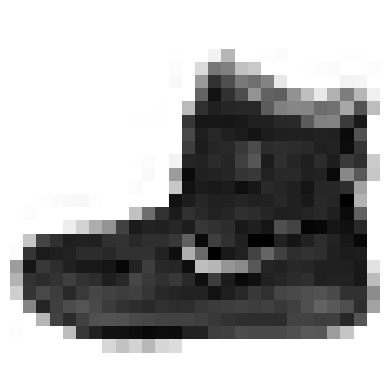

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [25]:
y_train

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [26]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
            'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [27]:
y_train[0]

9

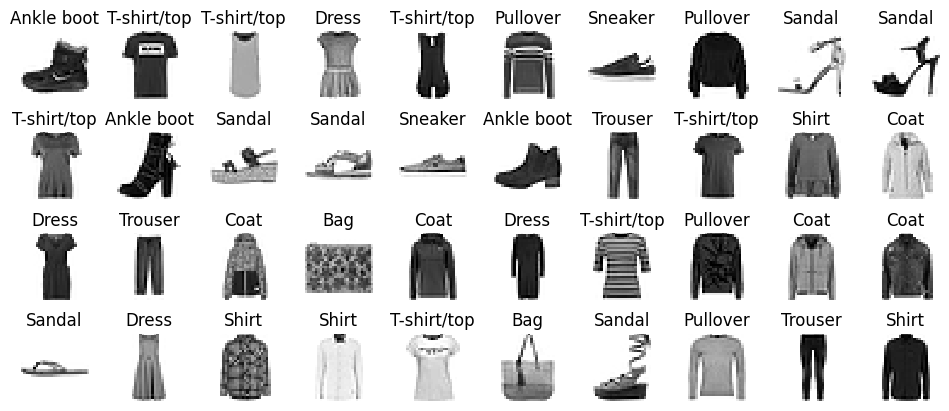

In [28]:
n_rows=4
n_cols=10

plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index=n_cols*row+col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2,hspace=0.5) #sekiller arasinda negder mesafe olmagini gaytarir
plt.show()

In [29]:
import tensorflow as tf
import numpy as np
import random

#Tesorflow sequential API

In [30]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

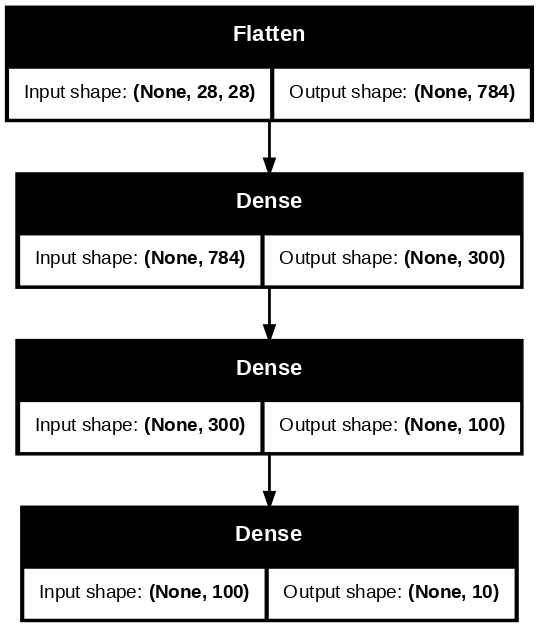

In [33]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [34]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [35]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer('dense') is hidden1

True

In [37]:
weights, biases=hidden1.get_weights()
weights

array([[ 0.05607851,  0.04481386,  0.03258116, ..., -0.02456375,
         0.07228348, -0.07261721],
       [ 0.05326483, -0.05859285,  0.05707841, ..., -0.04633103,
         0.06314875, -0.00723618],
       [-0.0346324 , -0.05318353, -0.06419116, ...,  0.02380779,
         0.06272759,  0.02654367],
       ...,
       [ 0.04286418, -0.00037253, -0.05761509, ...,  0.03893487,
         0.06414817,  0.05910264],
       [-0.0622736 ,  0.03128087,  0.0421105 , ..., -0.06977804,
         0.00662833,  0.04836767],
       [ 0.05792435,  0.01807494,  0.05898654, ...,  0.02130845,
         0.00213166,  0.03768162]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

#Compiling the model

In [41]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [42]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [43]:
tf.keras.utils.to_categorical([0,5,1,0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
import numpy as np

np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

#Training and evaluating the model

In [45]:
history=model.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.8038 - sparse_categorical_accuracy: 0.4812 - val_loss: 1.0173 - val_sparse_categorical_accuracy: 0.7050
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9216 - sparse_categorical_accuracy: 0.7094 - val_loss: 0.8019 - val_sparse_categorical_accuracy: 0.7428
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7421 - sparse_categorical_accuracy: 0.7563 - val_loss: 0.7222 - val_sparse_categorical_accuracy: 0.7564
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6564 - sparse_categorical_accuracy: 0.7825 - val_loss: 0.6765 - val_sparse_categorical_accuracy: 0.7668
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6013 - sparse_categorical_accuracy: 0.7964 - val_loss: 0.6466 - val_sparse_categorical_accuracy: 0.7746
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5614 - sparse_categorical_accuracy: 0.8135 - val_loss: 0.6235 - val_sparse_categorical_accuracy: 0.7808
Epo

In [46]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 157}

In [47]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [48]:
history.history

{'loss': [1.4650334119796753,
  0.8673053979873657,
  0.7211448550224304,
  0.6455496549606323,
  0.5958787798881531,
  0.5595749020576477,
  0.531623125076294,
  0.5091331005096436,
  0.49031513929367065,
  0.4742186963558197,
  0.46009618043899536,
  0.4476310908794403,
  0.4363485276699066,
  0.4263356328010559,
  0.4170670807361603,
  0.40857061743736267,
  0.40069493651390076,
  0.393218457698822,
  0.3861696422100067,
  0.3793873190879822,
  0.3730033338069916,
  0.36692938208580017,
  0.36108219623565674,
  0.35540223121643066,
  0.34993353486061096,
  0.34474289417266846,
  0.3396625816822052,
  0.33469077944755554,
  0.3298400342464447,
  0.32515445351600647],
 'sparse_categorical_accuracy': [0.5920000076293945,
  0.7264000177383423,
  0.7657999992370605,
  0.7900000214576721,
  0.8023999929428101,
  0.8155999779701233,
  0.8266000151634216,
  0.8320000171661377,
  0.8385999798774719,
  0.8446000218391418,
  0.8501999974250793,
  0.8528000116348267,
  0.855400025844574,
  0.85

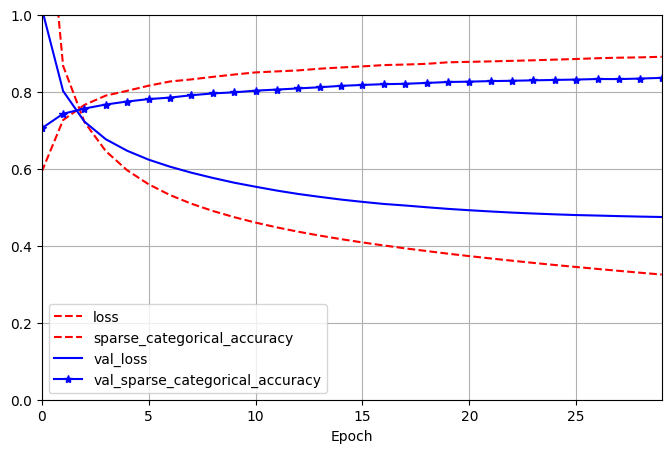

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=['r--','r--','b-','b-*'])
plt.legend(loc='lower left')
plt.show()

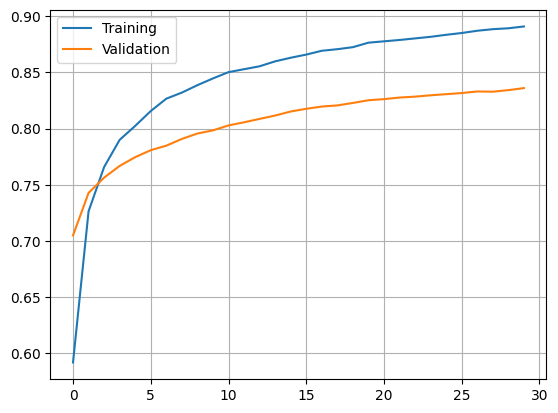

In [52]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Training')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation')
plt.legend()
plt.grid()
plt.show()

In [53]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5056 - sparse_categorical_accuracy: 0.8228


[0.5128644704818726, 0.8184000253677368]

In [54]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.2 , 0.02, 0.62],
       [0.  , 0.  , 0.82, 0.  , 0.01, 0.  , 0.18, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [55]:
y_pred=np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [57]:
class_names[5]

'Sandal'

In [58]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

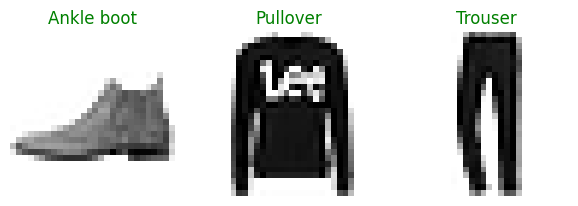

In [65]:
plt.figure(figsize=(7.2,2.4))
for index,image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image,cmap='binary',interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]],color='g' if y_pred[index]==y_new[index] else 'r')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()